Import required packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
orange = '#E68142'
blue = '#5780DC'
green = '#1EC81E'
yellow = '#FFD364'
lightblue = '#B0D6FB'
purple = '#8424AC'
brown = '#886441'
grey = '#939292'
transparent = 'rgba(0,0,0,0)'

Load data:

In [2]:
df = pd.read_csv('oldfaithful.csv')

In [3]:
df

,Eruption,Waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


Text(0, 0.5, 'Waiting time to next eruption (minutes)')

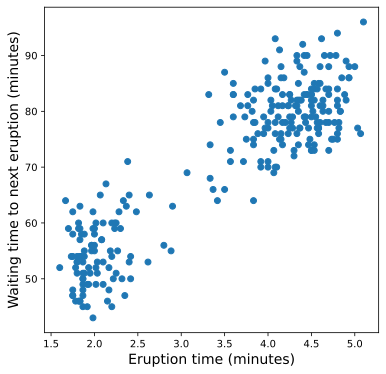

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time (minutes)', fontsize=14)
plt.ylabel('Waiting time to next eruption (minutes)',fontsize=14)

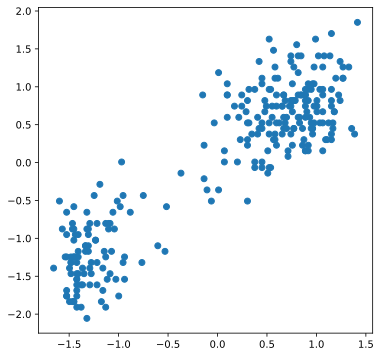

In [5]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["Eruption","Waiting"])
df_scaled
plt.figure(figsize=(6, 6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1])

Text(0, 0.5, 'Waiting time to next eruption (minutes)')

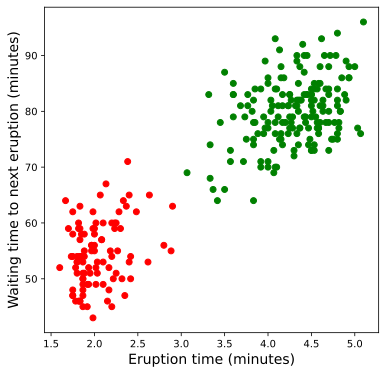

In [6]:
df1 = df[df['Eruption']<3]
df2 = df[df['Eruption']>3]
plt.figure(figsize=(6, 6))
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1],color='red')
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1],color='green')
plt.xlabel('Eruption time (minutes)', fontsize=14)
plt.ylabel('Waiting time to next eruption (minutes)', fontsize=14)

     Eruption   Waiting
214 -0.062130 -0.508259
79   0.098499  0.891892


Text(0, 0.5, 'Waiting time to next eruption (minutes)')

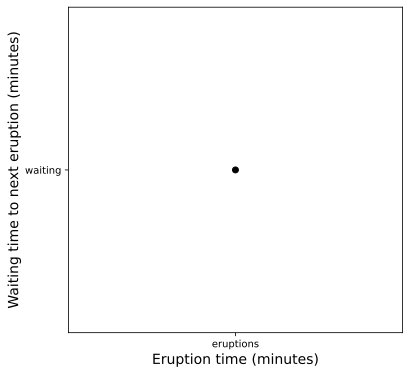

In [7]:
current_centers = df_scaled.sample(2,random_state=1)
print(current_centers)
plt.figure(figsize=(6, 6))
plt.scatter(x='eruptions',y='waiting',
           c='black',
           data=df_scaled)

plt.xlabel('Eruption time (minutes)', fontsize=14)
plt.ylabel('Waiting time to next eruption (minutes)', fontsize=14)

     Eruption   Waiting
214 -0.062130 -0.508259
79   0.098499  0.891892


ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 1.

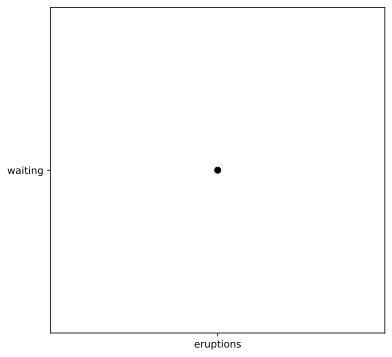

In [8]:
current_centers = df_scaled.sample(2,random_state=1)
print(current_centers)
plt.figure(figsize=(6, 6))
plt.scatter(x='eruptions',y='waiting',
           c='black',
           data=df_scaled)
plt.scatter(x='eruptions',y='waiting', 
           data=current_centers,
           c=['red','green'],marker='*',
           s=200)
plt.xlabel('Eruption time (minutes)', fontsize=14)
plt.ylabel('Waiting time to next eruption (minutes)', fontsize=14)

In [ ]:
# distance
def dist(x, y):
    return sum((xi - yi) ** 2 for xi, yi in zip(x, y))

def assign_cluster_labels(data, centers):
    cluster_labels = []
    for point in data:
        distances = [dist(point, center) for center in centers]
        cluster_labels.append(distances.index(min(distances)))
    return cluster_labels

current_labels = assign_cluster_labels(df_scaled[['eruptions','waiting']].values, 
                                      current_centers[['eruptions','waiting']].values)
plt.figure(figsize=(6, 6))
plt.scatter(x='eruptions',y='waiting',c=current_labels,data=df_scaled)
plt.scatter(x='eruptions',y='waiting',data=current_centers,c=['red','green'],marker='*', s=200)
plt.xlabel('Eruption time (minutes)', fontsize=14)
plt.ylabel('Waiting time to next eruption (minutes)', fontsize=14)

In [ ]:
current_centers = df_scaled[['eruptions','waiting']].groupby(current_labels).mean()
print(current_centers)
current_labels = assign_cluster_labels(df_scaled[['eruptions','waiting']].values, 
                                      current_centers.values)

plt.figure(figsize=(6, 6))
plt.scatter(x='eruptions',y='waiting',c=current_labels,data=df_scaled)
plt.scatter(x='eruptions',y='waiting',data=current_centers,c=['red','green'],marker='*', s=200)
plt.xlabel('Eruption time (minutes)', fontsize=14)
plt.ylabel('Waiting time to next eruption (minutes)', fontsize=14)

In [ ]:
current_centers = df_scaled[['eruptions','waiting']].groupby(current_labels).mean()
print(current_centers)
current_labels = assign_cluster_labels(df_scaled[['eruptions','waiting']].values, 
                                      current_centers.values)

plt.figure(figsize=(6, 6))
plt.scatter(x='eruptions',y='waiting',c=current_labels,data=df_scaled)
plt.scatter(x='eruptions',y='waiting',data=current_centers,c=['red','green'],marker='*', s=200)
plt.xlabel('Eruption time (minutes)', fontsize=14)
plt.ylabel('Waiting time to next eruption (minutes)', fontsize=14)

In [ ]:
WCSS = []
k = [1,2,3,4,5]
for j in k:
    km = KMeans(n_clusters = j)
    km = km.fit(df_scaled)
    WCSS.append(km.inertia_)
print(WCSS)

In [ ]:
d = {'k': [1, 2, 3, 4, 5], 'WCSS': [50440, 8901, 5229, 2941, 2036]}
wcss = pd.DataFrame(data=d)
wcss

In [ ]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(k, WCSS, 'b*-')
plt.xlabel('Number of clusters (k)', fontsize="14")
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize="14")


In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(df)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca.components_

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.plot([0, 10*pca.components_[0,0]], [0, 10*pca.components_[0,1]],'k-')
plt.plot([0, 10*pca.components_[1,0]], [0, 10*pca.components_[1,1]],'r-')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time to next eruption (minutes)')

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.xlim(-3,  3)
plt.ylim(-3, 3)

In [ ]:
df

In [ ]:
df = pd.read_csv("https://pkgstore.datahub.io/machine-learning/iris/iris_csv/data/8bce8766530bf404228ea3fc026dfee3/iris_csv.csv")

In [ ]:
df

In [ ]:
df = df[["petallength","sepalwidth"]]

In [ ]:
WCSS = [3.458, 1.769, 0.882, 0.759, 0.664]

In [ ]:
ax = plt.figure().gca()
plt.plot(k, WCSS, 'bo-')
plt.xlabel('Number of clusters (k)', fontsize="14")
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize="14")

In [11]:
df.Waiting > 80

0      False
1      False
2      False
3      False
4       True
       ...  
267     True
268    False
269     True
270    False
271    False
Name: Waiting, Length: 272, dtype: bool

In [1]:
int(2.2)

2